In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

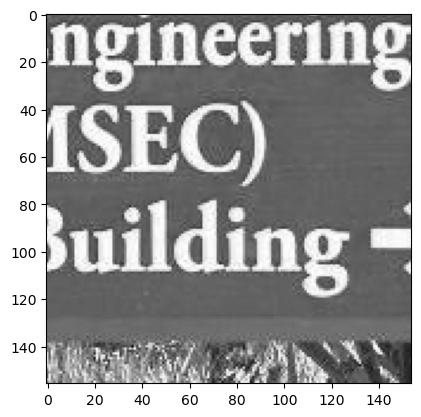

In [2]:
image = cv2.imread('D:/Yr 3/Semester 2/CS389/Project/Picture1.png', 0)
plt.imshow(image, cmap='gray')

NEAREST NEIGHBOR INTERPOLATION

In [3]:
def nearest_neighbor_interpolation(image, new_width, new_height):

    new_image = np.zeros((new_height, new_width), dtype=np.uint8)

    scale_x = float(image.shape[1]) / new_width
    scale_y = float(image.shape[0]) / new_height

    for y in range(new_height):
        for x in range(new_width):
            px = int(x * scale_x)
            py = int(y * scale_y)

            if px >= image.shape[1]:
                px = image.shape[1] - 1
            if py >= image.shape[0]:
                py = image.shape[0] - 1

            new_image[y, x] = image[py, px]
    return new_image


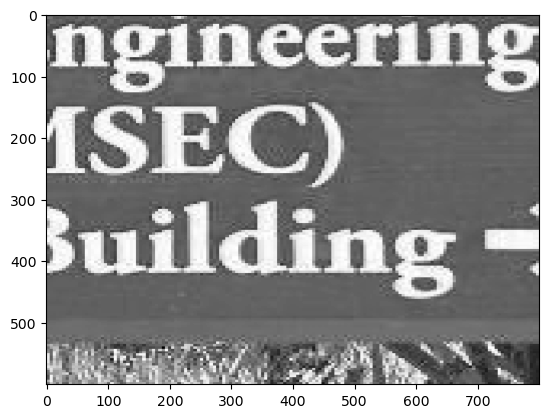

In [4]:
image = cv2.imread('D:/Yr 3/Semester 2/CS389/Project/Picture1.png', 0)

new_width = 800
new_height = 600

nn = nearest_neighbor_interpolation(image, new_width, new_height)
plt.imshow(nn, cmap='gray')

BILINEAR INTERPOLATION

In [5]:
def bilinear_interpolation(image, new_width, new_height):
    
    scale_x = float(image.shape[1]) / new_width
    scale_y = float(image.shape[0]) / new_height
    
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            px = x * scale_x
            py = y * scale_y

            x1, y1 = int(px), int(py)
            x2, y2 = x1 + 1, y1 + 1

            if x2 >= image.shape[1]:
                x2 = x1
            if y2 >= image.shape[0]:
                y2 = y1

            tl = image[y1, x1]
            tr = image[y1, x2]
            bl = image[y2, x1]
            br = image[y2, x2]

            qx = px - x1
            qy = py - y1

            top = tl * (1 - qx) + tr * qx

            bottom = bl * (1 - qx) + br * qx

            interpolated = top * (1 - qy) + bottom * qy

            new_image[y, x] = interpolated

    return new_image

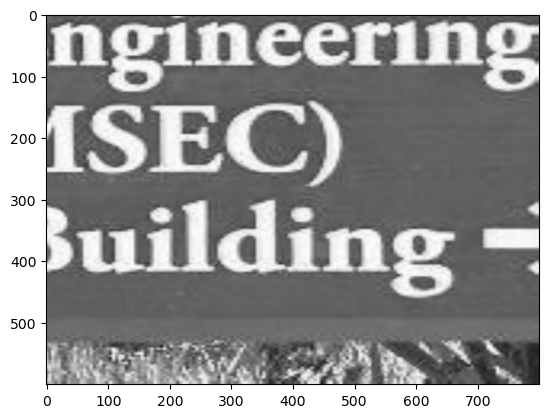

In [6]:
image = cv2.imread('D:/Yr 3/Semester 2/CS389/Project/Picture1.png', 0)

new_width = 800
new_height = 600

bilinear = bilinear_interpolation(image, new_width, new_height)
plt.imshow(bilinear, cmap='gray')